In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


Q1 :1.

In [12]:
mu1 = np.array([-1, 1])
mu2 = np.array([-2.5, 2.5])
mu3 = np.array([-4.5, 4.5])
sigma = np.array([[1, 0], [0, 1]])
train_set_size = 700
# list training set
train_set = []
for i in range(train_set_size):
  p = np.random.rand() # probability for each distribution
  if p <= 1/3:
      sample = np.random.multivariate_normal(mu1, sigma)
      sample = np.append(sample, 1)
      train_set.append(sample)
  elif p <= 2/3:
      sample = np.random.multivariate_normal(mu2, sigma)
      sample = np.append(sample, 2)
      train_set.append(sample)
  else:
      sample = np.random.multivariate_normal(mu3, sigma)
      sample = np.append(sample, 3)
      train_set.append(sample)


Q1 :2.

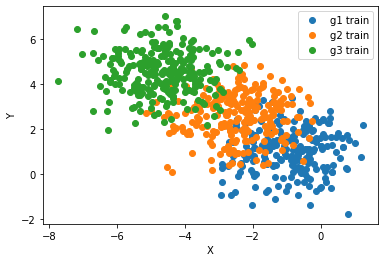

In [13]:
# split the training set by distribution
train_data = pd.DataFrame(train_set, columns=['x', 'y', 'label'])
train_g1 = train_data[(train_data['label'] == 1)]
train_g2 = train_data[(train_data['label'] == 2)]
train_g3 = train_data[(train_data['label'] == 3)]
# plot of the training set
fig, ax = plt.subplots()
ax.plot(train_g1['x'], train_g1['y'], 'o', label='g1 train')
ax.plot(train_g2['x'], train_g2['y'], 'o', label='g2 train')
ax.plot(train_g3['x'], train_g3['y'], 'o', label='g3 train')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Q1:3.

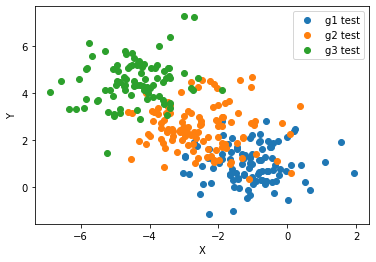

In [14]:
test_set_size = 300
# list training set
test_set = []
for i in range(test_set_size):
  p = np.random.rand() # probability for each distribution
  if p <= 1/3:
      sample = np.random.multivariate_normal(mu1, sigma)
      sample = np.append(sample, 1)
      test_set.append(sample)
  elif p <= 2/3:
      sample = np.random.multivariate_normal(mu2, sigma)
      sample = np.append(sample, 2)
      test_set.append(sample)
  else:
      sample = np.random.multivariate_normal(mu3, sigma)
      sample = np.append(sample, 3)
      test_set.append(sample)
test_data = pd.DataFrame(test_set, columns=['x', 'y', 'label'])
test_g1 = test_data[(test_data['label'] == 1)]
test_g2 = test_data[(test_data['label'] == 2)]
test_g3 = test_data[(test_data['label'] == 3)]
# plot of the test set
fig, ax = plt.subplots()
ax.plot(test_g1['x'], test_g1['y'], 'o', label='g1 test')
ax.plot(test_g2['x'], test_g2['y'], 'o', label='g2 test')
ax.plot(test_g3['x'], test_g3['y'], 'o', label='g3 test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Q1:4.

In [36]:
def error_rate(train_label, predict_label):
    count = 0
    for i in range(0, len(train_label)):
        if train_label[i] != predict_label[i]:
            count += 1
    return count / len(train_label)


neighbor = KNeighborsClassifier(n_neighbors=200) # 1-NN
neighbor.fit(train_data[['x', 'y']], train_data['label'])
predict_train = neighbor.predict(train_data[['x', 'y']])
predict_test = neighbor.predict(test_data[['x', 'y']])
train_error = error_rate(train_data['label'], predict_train)
test_error = error_rate(test_data['label'], predict_test)
print(train_error)
print(test_error)




0.12571428571428572
0.15


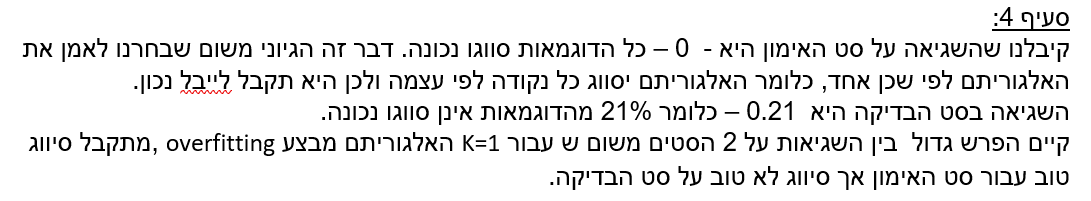

Q1:5.

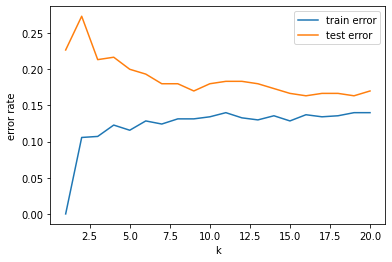

In [8]:
train_error_arr = []
test_error_arr = []
for k in range(1, 21):
    neig = KNeighborsClassifier(n_neighbors=k) # KNN
    neig.fit(train_data[['x', 'y']], train_data['label'])
    predict_train = neig.predict(train_data[['x', 'y']])
    predict_test = neig.predict(test_data[['x', 'y']])
    train_error_arr.append(error_rate(train_data['label'], predict_train))
    test_error_arr.append(error_rate(test_data['label'], predict_test))
# plot of the error in different k
fig, ax = plt.subplots()
x = np.arange(1, 21)
ax.plot(x, train_error_arr , label='train error')
ax.plot(x, test_error_arr, label='test error')
plt.xlabel('k')
plt.ylabel('error rate')
plt.legend()
plt.show()


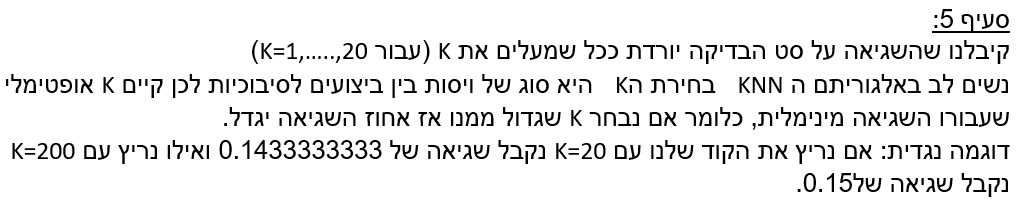

Q1:6.

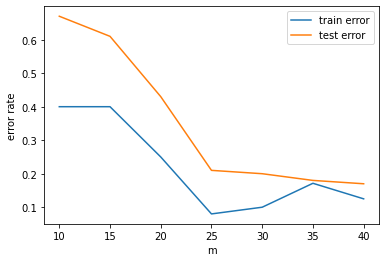

In [22]:
new_train_error_arr = []
new_test_error_arr = []
new_test_set = []
for i in range(100):
    p = np.random.rand() # probability for each distribution
    if p <= 1/3:
        sample = np.random.multivariate_normal(mu1, sigma)
        sample = np.append(sample, 1)
        new_test_set.append(sample)
    elif p <= 2/3:
        sample = np.random.multivariate_normal(mu2, sigma)
        sample = np.append(sample, 2)
        new_test_set.append(sample)
    else:
        sample = np.random.multivariate_normal(mu3, sigma)
        sample = np.append(sample, 3)
        new_test_set.append(sample)
new_test_data = pd.DataFrame(new_test_set, columns=['x', 'y', 'label'])
# list training set
train_set_size_arr = [10, 15, 20, 25, 30, 35, 40]
for i in train_set_size_arr:
    new_train_set = []
    for j in range(i):
        p = np.random.rand() # probability for each distribution
        if p <= 1/3:
            sample = np.random.multivariate_normal(mu1, sigma)
            sample = np.append(sample, 1)
            new_train_set.append(sample)
        elif p <= 2/3:
            sample = np.random.multivariate_normal(mu2, sigma)
            sample = np.append(sample, 2)
            new_train_set.append(sample)
        else:
            sample = np.random.multivariate_normal(mu3, sigma)
            sample = np.append(sample, 3)
            new_train_set.append(sample)
    new_train_data = pd.DataFrame(new_train_set, columns=['x', 'y', 'label'])
    neig = KNeighborsClassifier(n_neighbors=10) # KNN
    neig.fit(new_train_data[['x', 'y']], new_train_data['label'])
    new_predict_train = neig.predict(new_train_data[['x', 'y']])
    new_predict_test = neig.predict(new_test_data[['x', 'y']])
    new_train_error_arr.append(error_rate(new_train_data['label'], new_predict_train))
    new_test_error_arr.append(error_rate(new_test_data['label'], new_predict_test))
# plot of the error in different train set size
fig, ax = plt.subplots()
x = [10, 15, 20, 25, 30, 35, 40]
ax.plot(x, new_train_error_arr, label='train error')
ax.plot(x, new_test_error_arr, label='test error')
plt.xlabel('m')
plt.ylabel('error rate')
plt.legend()
plt.show()

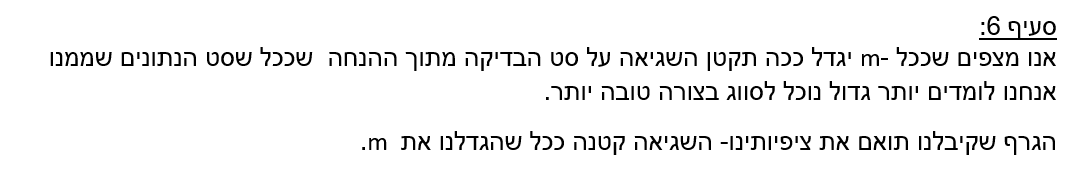

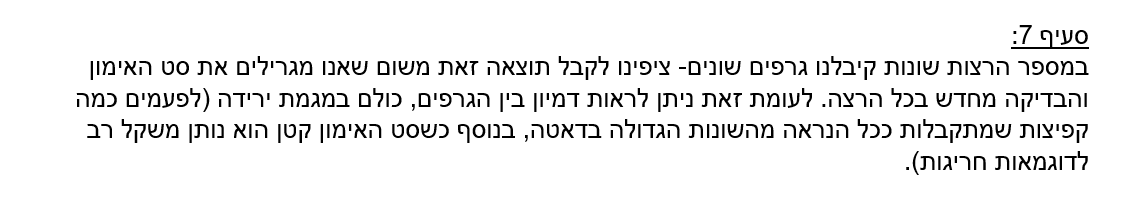

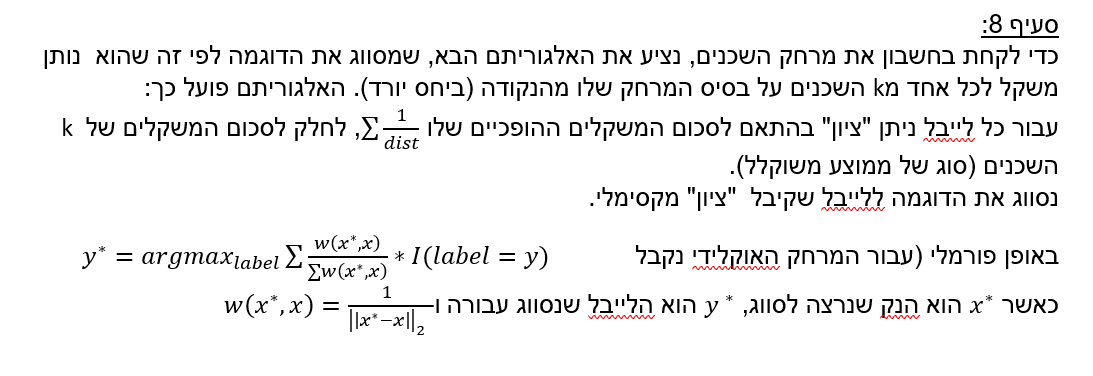